### Social Housing exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd

In [ ]:
# df_sh = pd.read_csv('../../data/social_housing/Donnees-detaillees-au-logement-du-repertoire-des-logements-locatifs-des-bailleurs-sociau.2024-01.csv', sep=';')
# column_labels = dict(zip(df_sh.columns, df_sh.iloc[0]))
# column_names = list(df_sh.columns)
# code_names = list(df_sh.iloc[0])
# df_sh.columns = df_sh.iloc[0]
# df_sh = df_sh[1:]
# df = df_sh[['QPV_CODE','DEP_CODE', 'EPCI_CODE', 'CODEPOSTAL', 'SURFHAB', 'CONSTRUCT', 'DATCONV', 'QPV_LIBELLE', 'X', 'Y']]
# df['count'] = 1
# df['SURFHAB'] = df['SURFHAB'].astype(float)
# #group by QPV_CODE and EPCI_CODE CONSTRUCT and DATCONV
# df['X'] = df['X'].astype(float)
# df['Y'] = df['Y'].astype(float)
# df['X'] = round(df['X']*0.01, 0)*100
# df['Y'] = round(df['Y']*0.01, 0)*100
# df_grouped = df.groupby(['QPV_CODE', 'DEP_CODE', 'EPCI_CODE', 'CODEPOSTAL', 'CONSTRUCT', 'DATCONV', 'QPV_LIBELLE', 'X', 'Y']).agg({'SURFHAB': 'mean', 'count': 'sum'}).reset_index()
# #for the DEP_CODE with only one character, add a 0 in front
# df_grouped['DEP_CODE'] = df_grouped['DEP_CODE'].astype(str)
# df_grouped['DEP_CODE'] = df_grouped['DEP_CODE'].str.zfill(2)
# df_grouped.to_csv('../../data/social_housing/agg_social_housing.csv', sep=';', index=False)

C:\Users\colin\AppData\Local\Temp\ipykernel_38240\1399011123.py:1: DtypeWarning: Columns (0,3,6,9,11,13,15,16,19,21,22,26,27,28,29,30,31,32,34,35,36,37,38,39,40,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sh = pd.read_csv('../../data/social_housing/Donnees-detaillees-au-logement-du-repertoire-des-logements-locatifs-des-bailleurs-sociau.2024-01.csv', sep=';')


In [2]:
df_grouped = pd.read_csv('../../data/social_housing/agg_social_housing.csv', sep=';')

C:\Users\colin\AppData\Local\Temp\ipykernel_48520\124365269.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_grouped = pd.read_csv('../../data/social_housing/agg_social_housing.csv', sep=';')


In [3]:
from shapely.geometry import Point

df_grouped['geometry'] = df_grouped.apply(lambda row: Point(float(row['X']), float(row['Y'])), axis=1)
#convert to a GeoDataFrame
import geopandas as gpd
df_grouped = gpd.GeoDataFrame(df_grouped, geometry='geometry')
df_grouped = df_grouped.set_crs(epsg=2154)
df_grouped = df_grouped.to_crs(epsg=4326)

In [ ]:
# epsg = 2154
# #start a folium map
# import folium

# # Define a color mapping based on the 'CONSTRUCT' column
# color_mapping = {
#     'Before 2000': 'blue',
#     '2000-2010': 'green',
#     'After 2010': 'red'
# }

# # Add a new column to classify construction years
# df_grouped['CONSTRUCT_CATEGORY'] = pd.cut(
#     df_grouped['CONSTRUCT'].astype(int),
#     bins=[0, 1999, 2010, float('inf')],
#     labels=['Before 2000', '2000-2010', 'After 2010']
# )

# # Create a folium map centered around the average coordinates
# m = folium.Map(location=[df_grouped['Y'].mean(), df_grouped['X'].mean()], zoom_start=6)
# # Add points to the map with different colors based on the 'CONSTRUCT_CATEGORY'
# for _, row in df_grouped.iterrows():
#     folium.CircleMarker(
#         location=(row['Y'], row['X']),
#         radius=row['count'] / 100,
#         color=color_mapping[row['CONSTRUCT_CATEGORY']],
#         fill=True,
#         fill_color=color_mapping[row['CONSTRUCT_CATEGORY']],
#         fill_opacity=0.6,
#         popup=f"QPV: {row['QPV_CODE']}, Count: {row['count']}, Year: {row['CONSTRUCT']}"
#     ).add_to(m)
# m

In [2]:
df_spei = pd.read_csv('C:/Users/colin/Downloads/spei.csv', sep=',')
df_anomaly_temp = pd.read_csv('C:/Users/colin/Downloads/temperature_anomaly.csv', sep=',')
df_spei['lat'] = df_spei['ID'].str.split('_').str[0].astype(float)
df_spei['lon'] = df_spei['ID'].str.split('_').str[1].astype(float)
df_anomaly_temp['lat'] = df_anomaly_temp['ID'].str.split('_').str[0].astype(float)
df_anomaly_temp['lon'] = df_anomaly_temp['ID'].str.split('_').str[1].astype(float)

In [3]:
df_meta = pd.read_csv('C:/Users/colin/Downloads/coordonnees_grille_safran_lambert-2-etendu.csv', sep=';')
df_meta['LAT_DG'] = df_meta['LAT_DG'].str.replace(',', '.')
df_meta['LAT_DG'] = df_meta['LAT_DG'].astype(float)
df_meta['LON_DG'] = df_meta['LON_DG'].str.replace(',', '.')
df_meta['LON_DG'] = df_meta['LON_DG'].astype(float)
df_meta['LAMBX (hm)'] = df_meta['LAMBX (hm)'].astype(float)
df_meta['LAMBY (hm)'] = df_meta['LAMBY (hm)'].astype(float)
df_spei = df_spei.merge(df_meta, left_on=['lat', 'lon'], right_on=['LAMBX (hm)', 'LAMBY (hm)'], how='left')
df_anomaly_temp = df_anomaly_temp.merge(df_meta, left_on=['lat', 'lon'], right_on=['LAMBX (hm)', 'LAMBY (hm)'], how='left')
df_meta['ID'] = df_meta['LAMBX (hm)'].astype(int).astype(str) + '_' + df_meta['LAMBY (hm)'].astype(int).astype(str)

In [122]:
df_spei

,ID,year,month,time,def_pr,spei,lat,lon,LAMBX (hm),LAMBY (hm),LAT_DG,LON_DG
0,1000_23290,1970,1,1970-01-16 00:00:00,2.699792,1.142342,1000.0,23290.0,1000.0,23290.0,47.7692,-4.34082
1,1000_23290,1970,2,1970-02-14 12:00:00,2.380476,1.007828,1000.0,23290.0,1000.0,23290.0,47.7692,-4.34082
2,1000_23290,1970,3,1970-03-16 00:00:00,0.309462,0.076555,1000.0,23290.0,1000.0,23290.0,47.7692,-4.34082
3,1000_23290,1970,4,1970-04-15 12:00:00,-0.294667,-0.238048,1000.0,23290.0,1000.0,23290.0,47.7692,-4.34082
4,1000_23290,1970,5,1970-05-16 00:00:00,-1.796452,-1.019978,1000.0,23290.0,1000.0,23290.0,47.7692,-4.34082
...,...,...,...,...,...,...,...,...,...,...,...,...
6568283,9960_25050,2024,12,2024-12-16 00:00:00,2.274086,1.019817,9960.0,25050.0,9960.0,25050.0,49.4187,7.79402
6568284,9960_25050,2025,1,2025-01-16 00:00:00,1.936022,0.839519,9960.0,25050.0,9960.0,25050.0,49.4187,7.79402
6568285,9960_25050,2025,2,2025-02-14 12:00:00,0.943690,0.310207,9960.0,25050.0,9960.0,25050.0,49.4187,7.79402
6568286,9960_25050,2025,3,2025-03-16 00:00:00,-1.147043,-0.925408,9960.0,25050.0,9960.0,25050.0,49.4187,7.79402


In [9]:
lau_2023 = gpd.read_file('../../data/LAU_2023_EU/lau_2023_final.shp')
lau_2023 = lau_2023[lau_2023.CNTR_CODE == 'FR']
lau_2023 = lau_2023.to_crs(epsg=4326)
city = lau_2023


In [10]:
#find the closest ID in df_meta of each centroid of the city
city['x'] = city.geometry.centroid.x
city['y'] = city.geometry.centroid.y

def find_closest_id(row, df_meta):
    # Calculate the distance between the row's coordinates and all coordinates in df_meta
    distances = np.sqrt((df_meta['LAT_DG'] - row['y'])**2 + (df_meta['LON_DG'] - row['x'])**2)
    # Find the index of the closest point
    closest_index = distances.idxmin()
    # Return the ID of the closest point
    return df_meta.loc[closest_index, 'ID']

city['closest_id'] = city.apply(find_closest_id, axis=1, df_meta=df_meta)

C:\Users\colin\AppData\Local\Temp\ipykernel_65648\2072093863.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city['x'] = city.geometry.centroid.x
C:\Users\colin\AppData\Local\Temp\ipykernel_65648\2072093863.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city['y'] = city.geometry.centroid.y


Text(0.5, 1.0, 'Summer Temperature Anomaly in 2023')

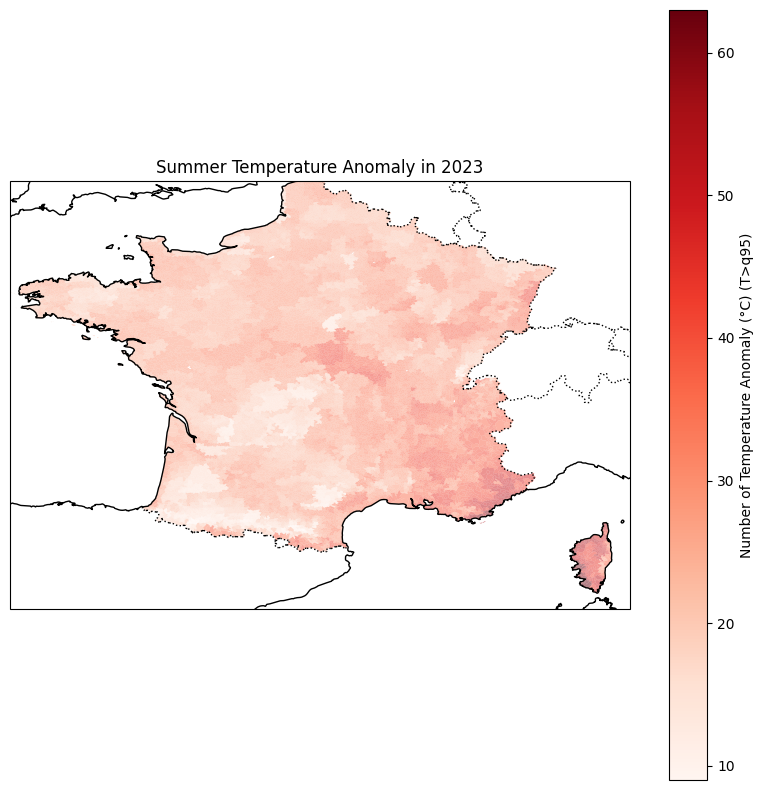

In [ ]:
df_summer_anomaly = df_anomaly_temp[(df_anomaly_temp['year'] == 2023) & (df_anomaly_temp['month'].isin([6, 7, 8]))]
df_summer_anomaly = df_summer_anomaly[['ID', 'year', 'month', 'positive_anomaly', 'negative_anomaly']].groupby(['ID', 'year']).agg({'positive_anomaly': 'sum', 'negative_anomaly': 'sum'}).reset_index()

city_temp = city.merge(df_summer_anomaly, left_on='closest_id', right_on='ID', how='left')

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-5, 10, 41, 51], crs=ccrs.PlateCarree())
# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
city_temp.plot(column='positive_anomaly', ax=ax, legend=True, cmap='Reds', alpha=0.5, linewidth=0, edgecolor='k', transform=ccrs.PlateCarree(), legend_kwds={'label': "Number of Temperature Anomaly (°C) (T>q95)", 'orientation': "horizontal"})
ax.set_title('Summer Temperature Anomaly in 2023')

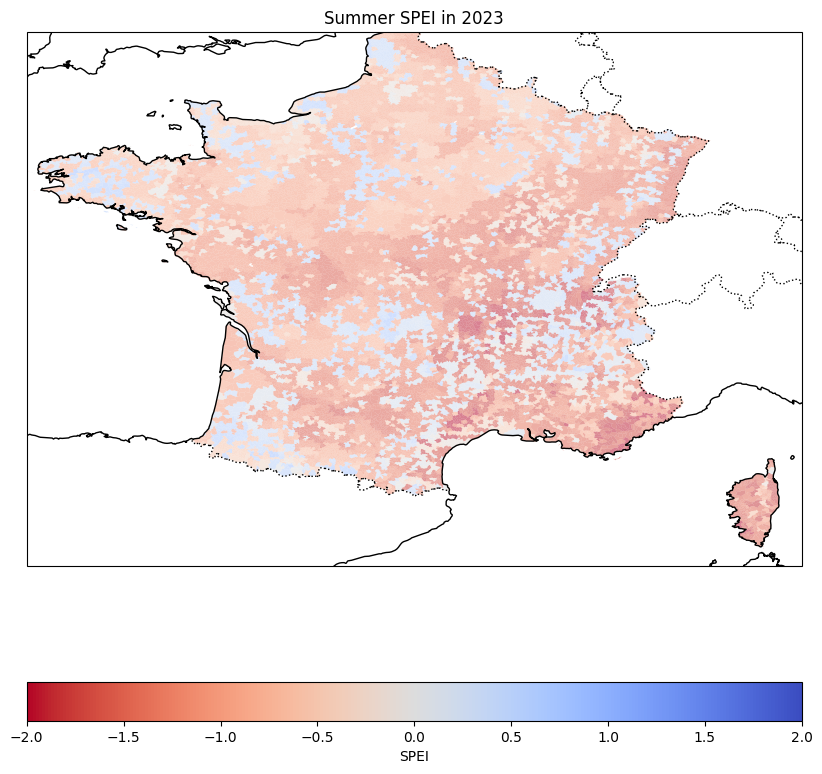

In [15]:
df_summer_spei = df_spei[(df_spei['year'] == 2023) & (df_spei['month'].isin([6, 7, 8]))]
df_summer_spei = df_summer_spei[['ID', 'year', 'month', 'spei']].groupby(['ID', 'year']).agg({'spei': 'mean'}).reset_index()
city_spei = city.merge(df_summer_spei, left_on='closest_id', right_on='ID', how='left')
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-5, 10, 41, 51], crs=ccrs.PlateCarree())
# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
city_spei.plot(column='spei', ax=ax, legend=True, cmap='coolwarm_r', alpha=0.5, linewidth=0, edgecolor='k', transform=ccrs.PlateCarree(), legend_kwds={'label': "SPEI", 'orientation': "horizontal"}, vmin=-2, vmax=2)
ax.set_title('Summer SPEI in 2023')
plt.show()

In [ ]:
df_temp_last = df_anomaly_temp[df_anomaly_temp['year'] >= 2014].groupby(['lon', 'lat', 'ID']).agg({'positive_anomaly': 'mean', 'negative_anomaly': 'mean'}).reset_index()
df_temp_last

lau_2023 = lau_2023.merge(df_temp_last, left_on='closest_id', right_on='ID', how='left')

In [ ]:
# df_spei_last = df_spei[df_spei['time'] >= '2014-01-01'].groupby(['lon', 'lat']).agg({'spei': 'mean'}).reset_index()
# df_spei_bsl = df_spei[df_spei['time'] < '1980-01-01'].groupby(['lon', 'lat']).agg({'spei': 'mean'}).reset_index()

# df_temp_last = df_anomaly_temp[df_anomaly_temp['year'] >= 2014].groupby(['lon', 'lat']).agg({'positive_anomaly': 'mean', 'negative_anomaly': 'mean'}).reset_index()
# df_temp_bsl = df_anomaly_temp[df_anomaly_temp['year'] < 1980].groupby(['lon', 'lat']).agg({'positive_anomaly': 'mean', 'negative_anomaly': 'mean'}).reset_index()

# df_spei_last = df_spei_last.set_index(['lon', 'lat']).to_xarray()
# df_spei_bsl = df_spei_bsl.set_index(['lon', 'lat']).to_xarray()
# df_temp_last = df_temp_last.set_index(['lon', 'lat']).to_xarray()
# df_temp_bsl = df_temp_bsl.set_index(['lon', 'lat']).to_xarray()

# df_spei_bsl = df_spei_bsl.reindex_like(df_spei_last, method="nearest", fill_value=np.nan)
# df_spei_bsl.attrs['crs'] = 'EPSG:27562'

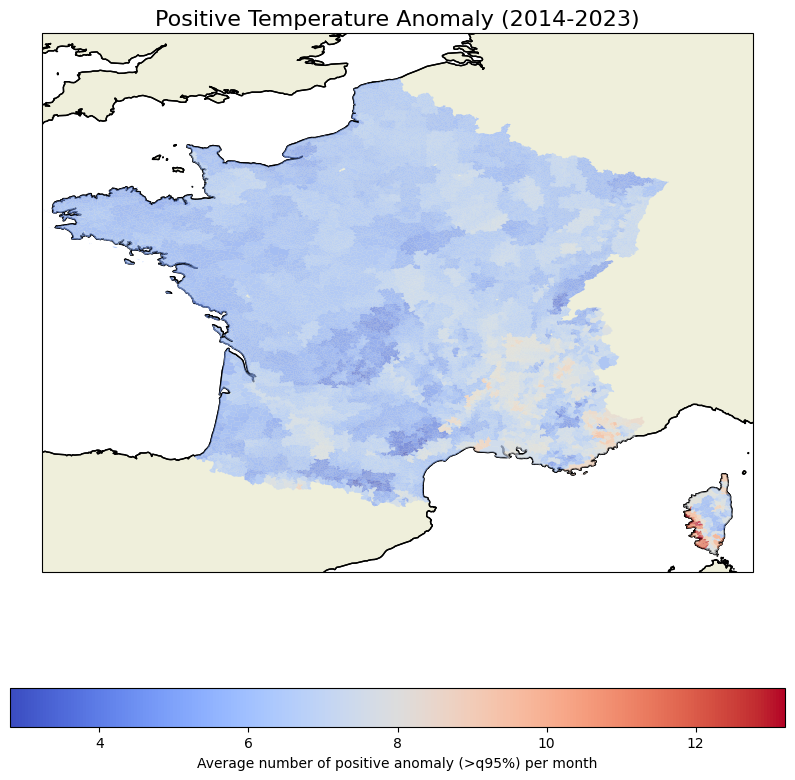

In [139]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1)

lau_2023.plot(column='positive_anomaly', ax=ax, legend=True, cmap='coolwarm', edgecolor='black', linewidth=0, alpha=0.7, legend_kwds={'label': "Average number of positive anomaly (>q95%) per month", 'orientation': "horizontal"})
ax.set_title('Positive Temperature Anomaly (2014-2023)', fontsize=16)
plt.show()

In [128]:
df_grouped_test = df_grouped[df_grouped['DEP_CODE'].isin(['34','31','91', '92', '93', '94'])]
df_grouped_test['x'] = df_grouped_test.geometry.x
df_grouped_test['y'] = df_grouped_test.geometry.y
df_grouped_test['CODEPOSTAL'] = df_grouped_test['CODEPOSTAL'].astype(str)

df_grouped_test['closest_id'] = df_grouped_test.apply(find_closest_id, axis=1, df_meta=df_meta)
df_grouped_test = df_grouped_test.merge(df_temp_last, left_on='closest_id', right_on='ID', how='left')
df_grouped_test = df_grouped_test.merge(lau_2023[['LAU_ID', 'positive_anomaly', 'negative_anomaly']], left_on='CODEPOSTAL', right_on='LAU_ID', how='left')

c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
df_grouped_test = df_grouped_test.dropna()
(df_grouped_test['positive_anomaly_x'] - df_grouped_test['positive_anomaly_y']).mean()

0.72114733837507

In [137]:
print((df_grouped_test.loc[df_grouped_test['CONSTRUCT']>2000].positive_anomaly_x - df_grouped_test.loc[df_grouped_test['CONSTRUCT']>2000].positive_anomaly_y).mean())
print((df_grouped_test.loc[df_grouped_test['CONSTRUCT']<=2000].positive_anomaly_x - df_grouped_test.loc[df_grouped_test['CONSTRUCT']<=2000].positive_anomaly_y).mean())

0.5243394815553342
0.8035580094351441


In [125]:
lau_2023[lau_2023.LAU_NAME=='Lodève']

,GISCO_ID,CNTR_CODE,LAU_ID,LAU_NAME,POP_2023,POP_DENS_2,AREA_KM2,YEAR,NUTS3_ID,UR TYPO,COASTAL,geometry,x,y,closest_id,lon,lat,ID,positive_anomaly,negative_anomaly
31151,FR_34142,FR,34142,Lodève,7477.0,NaN,321.884096,2023,FRJ13,intermediate,coastal,"POLYGON ((3.32921 43.70032, 3.31428 43.70921, ...",3.30553,43.730976,6760_18570,18570.0,6760.0,6760_18570,4.823529,1.183824
